# World Happiness Report

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [130]:
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [131]:
data = df.drop(["Country",'Region','Happiness Rank','Happiness Score','Standard Error'],axis=1)

In [132]:
data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [133]:
data.dtypes

Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [134]:
data.isnull().sum()

Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [135]:
data.describe()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

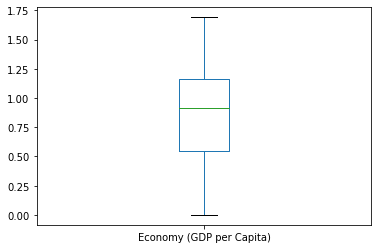

In [136]:
data['Economy (GDP per Capita)'].plot.box()

<AxesSubplot:>

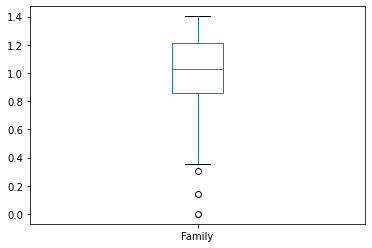

In [137]:
data['Family'].plot.box()

<AxesSubplot:>

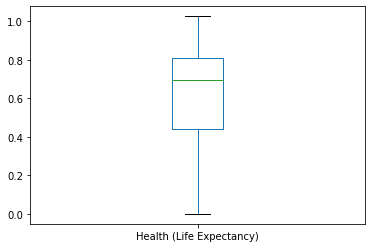

In [138]:
data['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

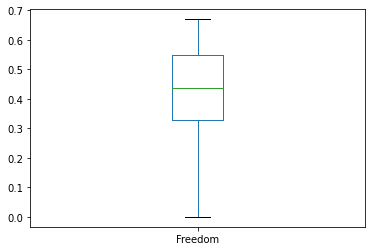

In [139]:
data['Freedom'].plot.box()

<AxesSubplot:>

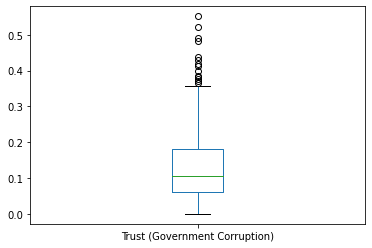

In [140]:
data['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

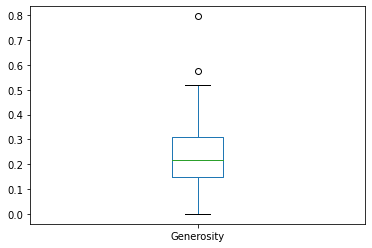

In [141]:
data['Generosity'].plot.box()

<AxesSubplot:>

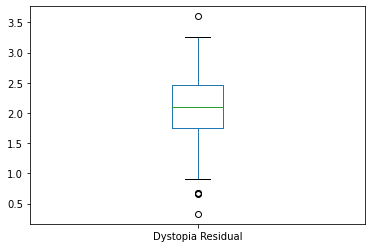

In [142]:
data['Dystopia Residual'].plot.box()

Economy (GDP per Capita)            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Family                           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Freedom                             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Trust (Government Corruption)    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Generosity                       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Dystopia Residual                      AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

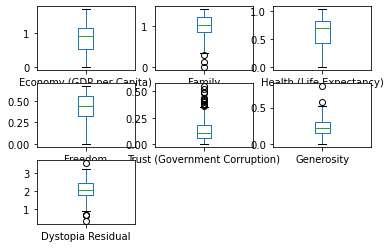

In [143]:
data.plot(kind='box',subplots=True,layout=(3,3))

In [144]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z

array([[1.36962124, 1.32028142, 1.26340809, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.13522625, 1.51445776, 1.28943383, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.19286069, 1.36105403, 0.99222882, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.45524543, 1.90108634, 0.37219907, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.06756644, 2.1184666 , 1.64964766, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.58633379, 3.13472485, 1.40412871, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [145]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([4, 5, 1, 4, 6, 1], dtype=int64))


In [146]:
z[128][1]

1.038636962306558

In [147]:
data.skew()

Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

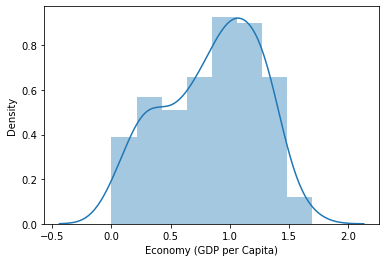

In [148]:
sns.distplot(data['Economy (GDP per Capita)'])

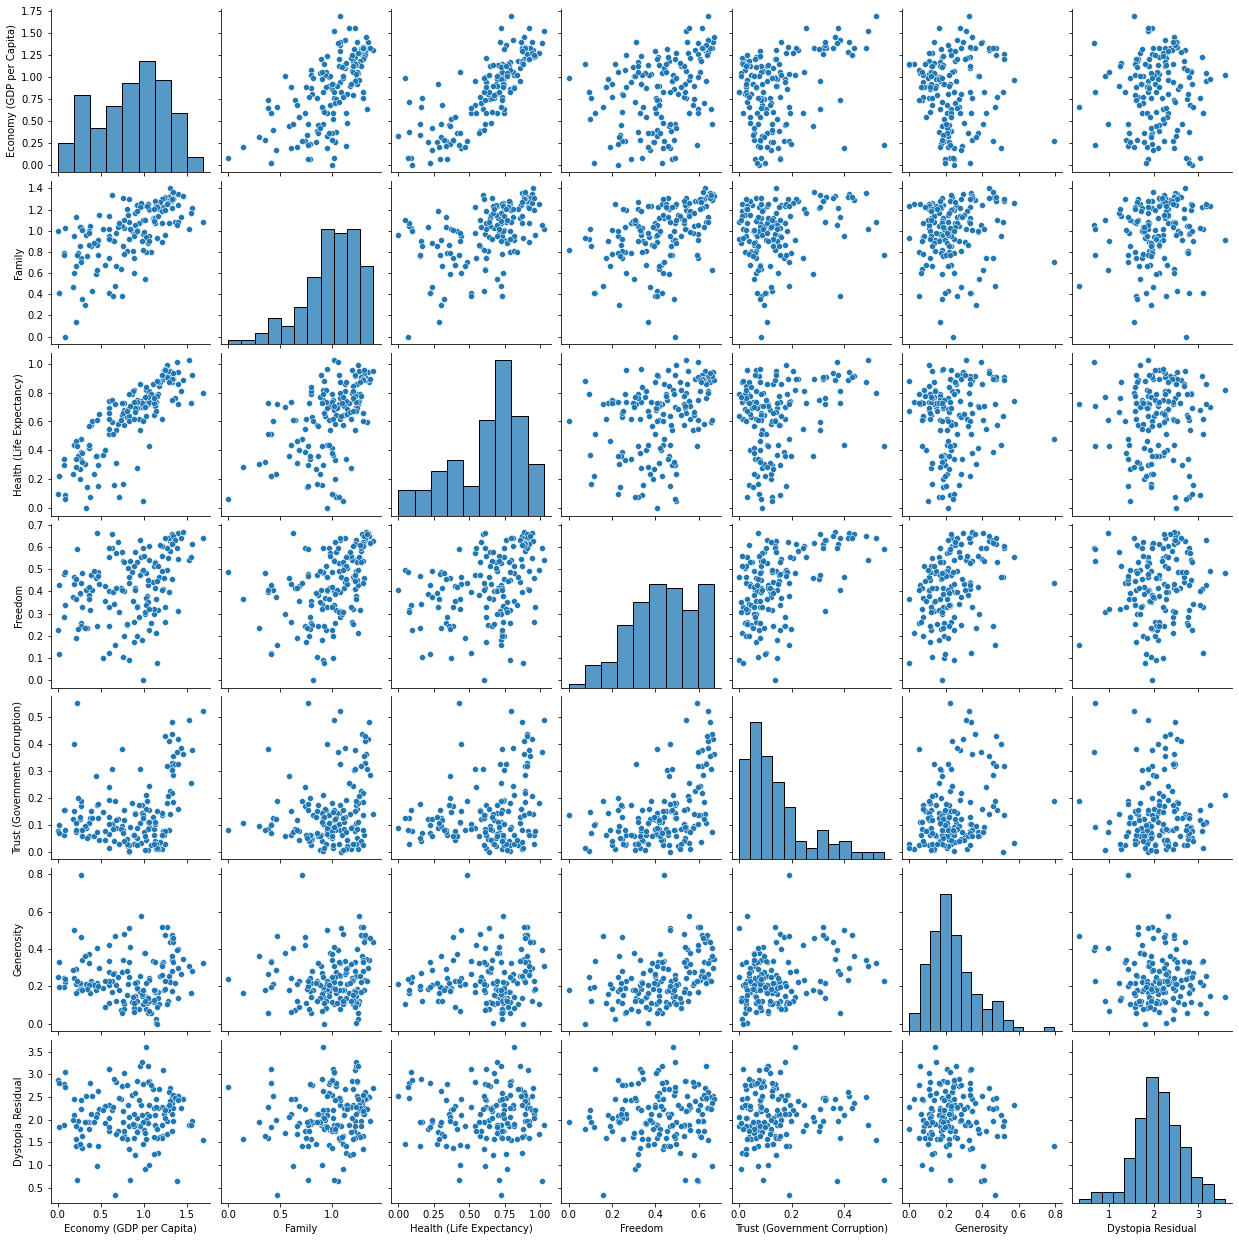

In [149]:
sns.pairplot(data)

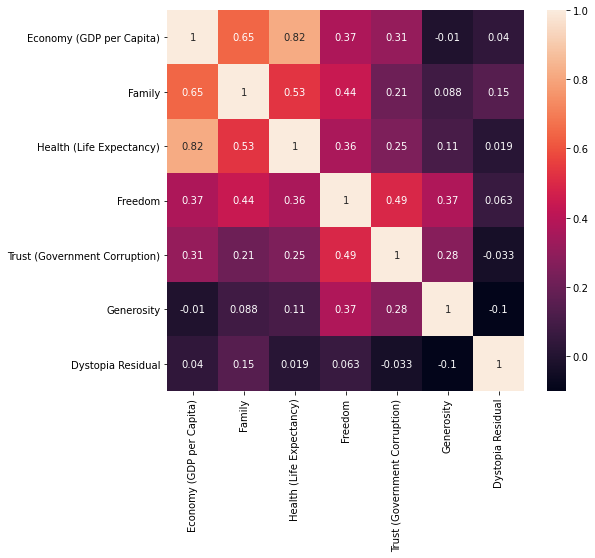

In [150]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [151]:
data_new=data[(z<3).all(axis=1)]
data_new.shape

(152, 7)

In [152]:
data.shape

(158, 7)

In [153]:
data=data_new
data.shape

(152, 7)

In [168]:
x=data.iloc[:,:-1]
x.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [155]:
y=data.iloc[:,-1]
y.head()

0    2.51738
1    2.70201
2    2.49204
3    2.46531
4    2.45176
Name: Dystopia Residual, dtype: float64

In [156]:
x.shape

(152, 6)

In [157]:
y.shape

(152,)

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=42)

In [171]:
x_train.shape

(136, 6)

In [172]:
y_train.shape

(136,)

In [173]:
x_test.shape

(16, 6)

In [174]:
y_test.shape

(16,)

In [186]:
lm = LinearRegression()

In [191]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Happiness Score",pred)
print("Actual Happiness Score",y_test)

Happiness Score [2.31603948 2.15084131 2.21837075 2.14276262 2.30893398 2.2433984
 2.06679357 2.12140808 2.20047306 2.27285167 2.08183552 1.99203605
 1.75502488 2.1436574  1.98222779 2.15152849]
Actual Happiness Score 69     1.86984
150    1.41723
97     1.21305
83     1.86040
137    1.79293
141    1.44395
26     2.67585
12     2.53320
18     2.41484
15     3.26001
136    1.94939
130    2.80791
109    1.69440
19     2.24743
70     1.76145
9      2.26646
Name: Dystopia Residual, dtype: float64


In [193]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))

error:
Mean absolute error: 0.4658591510089013
Mean squared error : 0.3158500787933928
